In [1]:
# Basic Libraries to start with

import math
import time
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
# load dataset

df = pd.read_csv('data\stress_survey_response.csv')

pd.options.display.max_columns = None

---

## Preprocessing

---

#### 1. Columns Renaming

In [3]:
df.columns

Index(['Age (in number)', 'Gender', 'Your current year in University?',
       'How many hours do you study daily? (in number)',
       'Do you find yourself completing assignments at last moment even though you were given enough time?',
       'Are you good at coping up with new faces on every new semester?',
       'Does your consumption of caffeine increase during exams?',
       'How many hours do you sleep daily? (in number)',
       'What is the depth of your sleep?',
       'Do you face difficulty in waking up?',
       'What kind of dreams do you get?', 'Do you face sleeping irregularity?',
       'Do you think that there is presence of a sleeping disorder in you?',
       'Do you take caffeine just before heading to bed?',
       'Do you feel difficulty in staying asleep once you fell asleep?',
       'Do you use sleep aids to fall asleep?',
       'Do you go to bed at the same time every night?',
       'Do thoughts race through your mind making it difficult to sleep?',
     

In [4]:
df = df.rename(columns={'Age (in number)' : 'age',
                        'Gender' : 'sex',
                        
                        'Your current year in University?' : 'study_year',
                        'How many hours do you study daily? (in number)' : 'study_hours',
                        'Do you find yourself completing assignments at last moment even though you were given enough time?' : 'late_submits',
                        'Are you good at coping up with new faces on every new semester?' : 'new_face_cope_up',
                        'Does your consumption of caffeine increase during exams?' : 'caffeine_increase_exam',
                        
                        'How many hours do you sleep daily? (in number)' : 'sleep_hours',
                        'What is the depth of your sleep?' : 'sleep_depth',
                        'Do you face difficulty in waking up?' : 'difficulty_waking_up',
                        'What kind of dreams do you get?' : 'dream_type',
                        'Do you face sleeping irregularity?' : 'sleeping_irregularity',
                        'Do you think that there is presence of a sleeping disorder in you?' : 'sleeping_disorder',
                        'Do you take caffeine just before heading to bed?' : 'caffeine_before_bed',
                        'Do you feel difficulty in staying asleep once you fell asleep?' : 'difficulty_staying_asleep',
                        'Do you use sleep aids to fall asleep?' : 'use_sleep_aids',
                        'Do you go to bed at the same time every night?' : 'bed_at_same_time',
                        'Do thoughts race through your mind making it difficult to sleep?' : 'thoughts_keep_awake',
                        
                        'Do you get scared or panicky for no good reason?' : 'scared/panicky',
                        'Do you feel lonely most of the time?' : 'lonely',
                        'In the past 4 weeks, how often did you feel hopeless? '  : 'hopeless',
                        'In the past 4 weeks, how often did you feel restless or fidgety?' : 'restless/fidgety',
                        'Do you feel irritability (বিরক্তি) most of the time?' : 'irritability',
                        'Do you lose your temper on simple matters?' : 'short_tempered',
                        'Do you face problems with your memory or concentration?' : 'memory/conentration_prob',
                        'Do you self-doubt your own decisions?' : 'self_doubt',
                        'Do you get frustrated in a short time?' : 'easily_frustrated',
                        'Did you ever feel inadequate (অপর্যাপ্ত) of yourself?' : 'inadequate',
                        'In the past 4 weeks, how often did you feel that everything was a lost effort? ' : 'lost_effort',
                        'Are you insecure about something or someone?' : 'insecure',
                        'In the past 4 weeks, about how often did  you feel nervous and strung up all the time?' : 'nervous_strungup',
                        'Are you grieving about something or someone?' : 'grieving',
                        'In the past 4 weeks, about how often did  you feel so nervous that nothing could  calm you down?' : 'not_calmed',
                        'Do you feel low self-esteem when comparing yourself to others?' : 'low_self_esteem',
                        'In the past 4 weeks, how often did you feel worthless?' : 'worthless',
                        'Are you worried about unnecessary thing all the time?' : 'worried',
                        'Found yourself wishing you were dead and away from it all?' : 'dead_wish',
                        'Does the idea of taking your own life keep coming into your mind?' : 'idea_kill_self',
                        'Did you ever feel that life isn\'t worth living?' : 'not_worth_living',
                        'In the past 4 weeks, how often did you feel so restless that you could not sit still?' : 'unable_sit_still',
                        'In the past 4 weeks, how often did you feel depressed?' : 'depressed',
                        'In the past 4 weeks, how often did you feel so sad that nothing could cheer you up?' : 'nothing_cheer_up',
                        
                        'Did you ever feel like your hands or body is shaking?' : 'shaking',
                        'In the past 4 weeks, about how often did  you feel tired out for no good reason?' : 'tired_out',
                        'Do you get headaches or dizziness often?' : 'headache/dizzy',
                        'In the past 4 weeks, did you go through a weight change?' : 'weight_change',
                        'Do you go through stomach aches often?' : 'stomach_ache',
                        'Do you feel that your heart is pumping faster and pounding louder?' : 'heart_pounding',
                        'Do you go through digestion problems often?' : 'digestion_probs',
                        'Did you ever found yourself breathing faster or over-breathing?' : 'over_breathing',
                        'Do you have sweating or clammy hands and feet?' : 'sweaty_hand/feet',
                        'Do you feel pain in your chest often?' : 'chest_pain',
                        'Did you ever feel that you are ill for no reason?' : 'ill_w/o_reason',
                        'Do you get muscle strain such as tensed shoulders and neck?' : 'muscle_strain',
                        'Do you feel tightness or pressure in your head?' : 'pressure_in_head',
                        
                        'Did you lose appetite or are binge eating?' : 'appetite_change',
                        'How many cups of caffeine do you consume in a day? ' : 'caffeine_per_day',
                        'How would you rate the communication among your family?' : 'family_communication',
                        'Was there any event of violence among your family members recently?' : 'violence_event',
                        'Is your family going through financial setbacks?' : 'financial_setback',
                        'Did any of your loved one pass away recently?' : 'death_of_loved_one',
                        'Did you hear any news on chronic illness or injury of yourself or loved ones?' : 'news_of_chronic_illness',
                        'Did you go through a breakup or got a divorce recently?' : 'breakup/divorced'})

In [5]:
df

,age,sex,study_year,study_hours,late_submits,new_face_cope_up,caffeine_increase_exam,sleep_hours,sleep_depth,difficulty_waking_up,dream_type,sleeping_irregularity,sleeping_disorder,caffeine_before_bed,difficulty_staying_asleep,use_sleep_aids,bed_at_same_time,thoughts_keep_awake,scared/panicky,lonely,hopeless,restless/fidgety,irritability,short_tempered,memory/conentration_prob,self_doubt,easily_frustrated,inadequate,lost_effort,insecure,nervous_strungup,grieving,not_calmed,low_self_esteem,worthless,worried,dead_wish,idea_kill_self,not_worth_living,unable_sit_still,depressed,nothing_cheer_up,shaking,tired_out,headache/dizzy,weight_change,stomach_ache,heart_pounding,digestion_probs,over_breathing,sweaty_hand/feet,chest_pain,ill_w/o_reason,muscle_strain,pressure_in_head,appetite_change,caffeine_per_day,family_communication,violence_event,financial_setback,death_of_loved_one,news_of_chronic_illness,breakup/divorced
0,21.0,Male,Second year,5.0,Yes,Yes,Yes,7,Deep,Yes,Positive things,No,No,Yes,Sometimes,Never,Yes,No,Often,Yes,Some of the time,Most of the time,No,Yes,No,Often,Yes,Yes,Some of the time,Yes,Most of the time,No,Some of the time,Yes,Most of the time,Yes,Yes,Sometimes,Sometimes,Some of the time,A little of the time,A little of the time,Yes,None of the time,No,No,No,Yes,No,Yes,Yes,No,Not at all,Sometimes,Sometimes,No,"greater than 3, less than 6",Good,No,No,No,Yes,No
1,20.0,Male,First year,2.5,No,No,No,8,Light,No,Positive things,No,No,No,Never,Never,No,Yes,Sometimes,Yes,Most of the time,A little of the time,No,No,Yes,Sometimes,No,Yes,A little of the time,Yes,A little of the time,Yes,None of the time,Yes,Most of the time,No,No,Never,Never,None of the time,Most of the time,Most of the time,No,Some of the time,No,No,No,No,No,No,No,No,Not at all,Often,Never,No,less than or equal 3,Neutral,No,No,No,No,No
2,21.0,Male,Second year,2.0,Yes,No,No,10,Neutral,No,Positive things,Yes,Yes,No,Often,Never,No,Yes,Sometimes,No,None of the time,Some of the time,No,Yes,Yes,Sometimes,No,No,None of the time,Yes,A little of the time,Yes,A little of the time,No,None of the time,No,No,Never,Never,None of the time,None of the time,A little of the time,Yes,Some of the time,Yes,Yes,No,Yes,Yes,Yes,Yes,No,Not at all,Sometimes,Sometimes,No,less than or equal 3,Good,No,No,Yes,Yes,No
3,23.0,Male,Fourth year,1.0,Yes,No,Yes,7,Deep,No,Positive things,No,No,No,Never,Never,Yes,No,Never,No,A little of the time,None of the time,No,No,No,Often,Yes,No,Some of the time,No,None of the time,No,None of the time,Yes,Some of the time,No,Yes,Never,Sometimes,None of the time,A little of the time,A little of the time,No,None of the time,No,No,No,No,No,No,No,No,Not at all,Never,Never,No,less than or equal 3,Good,No,Yes,No,No,No
4,21.0,Male,Third year,1.0,Yes,No,No,7,Deep,Yes,Positive things,Yes,Yes,No,Never,Sometimes,No,Yes,Often,No,All of the time,All of the time,No,No,Yes,Never,Yes,No,All of the time,No,All of the time,Yes,Some of the time,No,None of the time,No,No,Never,Never,Some of the time,Most of the time,Some of the time,Yes,Some of the time,Yes,Yes,No,Yes,Yes,Yes,No,Yes,No more than usual,Sometimes,Sometimes,No,less than or equal 3,Neutral,No,Yes,Yes,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,20.0,Female,Second year,5.0,Yes,No,No,6,Mixed,Yes,Positive things,Yes,Yes,No,Never,Never,No,Yes,Sometimes,No,Some of the time,All of the time,Yes,Yes,Yes,Sometimes,Yes,Yes,Some of the time,Yes,Most of the time,Yes,Most of the time,Yes,Some of the time,Yes,No,Sometimes,Never,Some of the time,Some of the time,Some of the time,Yes,Most of the time,Yes,No,Yes,No,No,No,No,No,No more than usual,Often,Sometimes,Yes,less than or equal 3,Neutral,No,Yes,No,No,No
186,25.0,Male,Fifth year and up,5.0,Yes,No,Yes,6,Mixed,Yes,Negative things,Yes,Yes,No,Sometimes,Sometimes,No,

In [6]:
# dropping duplicate values if exist

df.drop_duplicates(keep=False, inplace=True)

In [7]:
# check for missing instances

pd.options.display.max_rows = None
print(df.isnull().sum())

age                          0
sex                          0
study_year                   0
study_hours                  0
late_submits                 0
new_face_cope_up             0
caffeine_increase_exam       0
sleep_hours                  0
sleep_depth                  0
difficulty_waking_up         0
dream_type                   0
sleeping_irregularity        0
sleeping_disorder            0
caffeine_before_bed          0
difficulty_staying_asleep    0
use_sleep_aids               0
bed_at_same_time             0
thoughts_keep_awake          0
scared/panicky               0
lonely                       0
hopeless                     0
restless/fidgety             0
irritability                 0
short_tempered               0
memory/conentration_prob     0
self_doubt                   0
easily_frustrated            0
inadequate                   0
lost_effort                  0
insecure                     0
nervous_strungup             0
grieving                     0
not_calm

In [8]:
df.describe()

,age,study_hours,sleep_hours
count,190.000000,190.000000,190.000000
mean,23.528947,2.923684,7.410526
std,3.216270,2.719850,1.699640
min,18.000000,0.000000,3.000000
25%,22.000000,1.000000,6.000000
50%,23.000000,2.000000,7.000000
75%,24.000000,4.000000,8.000000
max,55.000000,24.000000,12.000000


Max age, and study hours are probably typos or done deliberately, so we will try to set a proper value there, if unable to do so, we will drop these columns.

In [9]:
# Age clean up
sorted_df = df['age'].sort_values(ascending=False)
sorted_df

133    55.0
188    40.0
98     31.0
70     30.0
145    29.0
87     29.0
135    28.0
124    28.0
129    27.0
134    27.0
28     27.0
130    27.0
137    27.0
187    27.0
152    26.0
169    26.0
5      26.0
138    25.0
128    25.0
50     25.0
92     25.0
102    25.0
83     25.0
181    25.0
84     25.0
71     25.0
164    25.0
186    25.0
9      25.0
170    25.0
156    25.0
110    25.0
151    25.0
16     25.0
20     25.0
176    25.0
77     24.0
91     24.0
66     24.0
65     24.0
94     24.0
97     24.0
67     24.0
132    24.0
118    24.0
144    24.0
163    24.0
160    24.0
158    24.0
155    24.0
154    24.0
168    24.0
141    24.0
119    24.0
61     24.0
173    24.0
125    24.0
123    24.0
122    24.0
121    24.0
64     24.0
166    24.0
23     24.0
31     24.0
45     24.0
47     24.0
49     24.0
19     24.0
21     24.0
38     24.0
36     24.0
34     24.0
37     24.0
29     24.0
26     24.0
57     24.0
25     24.0
131    23.0
63     23.0
14     23.0
172    23.0
105    23.0
43     23.0
107 

In [10]:
# selecting rows that have age higher than 31
data_clean = df[((df.age > 31))].index

# reassigning age in accord of the study year of the student
for i in data_clean:
    data = df['age'].loc[df['study_year'] == df['study_year'].loc[i]]
    df['age'].loc[i] = int(data.median())

df.loc[data_clean]

,age,sex,study_year,study_hours,late_submits,new_face_cope_up,caffeine_increase_exam,sleep_hours,sleep_depth,difficulty_waking_up,dream_type,sleeping_irregularity,sleeping_disorder,caffeine_before_bed,difficulty_staying_asleep,use_sleep_aids,bed_at_same_time,thoughts_keep_awake,scared/panicky,lonely,hopeless,restless/fidgety,irritability,short_tempered,memory/conentration_prob,self_doubt,easily_frustrated,inadequate,lost_effort,insecure,nervous_strungup,grieving,not_calmed,low_self_esteem,worthless,worried,dead_wish,idea_kill_self,not_worth_living,unable_sit_still,depressed,nothing_cheer_up,shaking,tired_out,headache/dizzy,weight_change,stomach_ache,heart_pounding,digestion_probs,over_breathing,sweaty_hand/feet,chest_pain,ill_w/o_reason,muscle_strain,pressure_in_head,appetite_change,caffeine_per_day,family_communication,violence_event,financial_setback,death_of_loved_one,news_of_chronic_illness,breakup/divorced
133,23.0,Female,Fourth year,6.0,Yes,Yes,Yes,8,Neutral,No,Positive things,No,No,No,Sometimes,Never,Yes,Yes,Often,Yes,A little of the time,A little of the time,Yes,Yes,No,Sometimes,No,No,Some of the time,Yes,Some of the time,Yes,A little of the time,No,None of the time,Yes,No,Never,Never,A little of the time,None of the time,None of the time,No,Some of the time,No,No,No,No,No,No,No,No,No more than usual,Never,Sometimes,No,less than or equal 3,Good,No,No,No,No,No
188,20.0,Male,First year,2.0,Yes,Yes,No,8,Neutral,No,Positive things,No,No,No,Never,Never,No,No,Never,No,A little of the time,A little of the time,No,No,No,Sometimes,No,Yes,A little of the time,No,A little of the time,No,None of the time,No,A little of the time,No,No,Never,Never,None of the time,None of the time,None of the time,No,A little of the time,No,No,No,No,No,No,No,No,Not at all,Never,Never,No,less than or equal 3,Good,No,Yes,No,No,No


In [11]:
# study hours clean up
sorted_df = df['study_hours'].sort_values(ascending=False)
sorted_df

6      24.0
32     10.0
118    10.0
120    10.0
147    10.0
33      9.0
37      8.0
71      8.0
85      8.0
88      8.0
134     8.0
16      7.0
55      7.0
111     7.0
98      6.0
104     6.0
136     6.0
11      6.0
133     6.0
108     6.0
91      6.0
124     6.0
181     6.0
58      6.0
115     5.0
41      5.0
106     5.0
74      5.0
66      5.0
0       5.0
27      5.0
29      5.0
14      5.0
186     5.0
185     5.0
183     5.0
116     5.0
57      5.0
132     5.0
127     5.0
103     4.0
99      4.0
145     4.0
146     4.0
139     4.0
89      4.0
157     4.0
171     4.0
72      4.0
184     4.0
67      4.0
131     4.0
59      4.0
149     4.0
95      4.0
18      4.0
28      4.0
54      3.0
117     3.0
96      3.0
97      3.0
39      3.0
182     3.0
107     3.0
109     3.0
110     3.0
26      3.0
84      3.0
21      3.0
19      3.0
142     3.0
148     3.0
180     3.0
155     3.0
174     3.0
167     3.0
44      3.0
113     3.0
53      3.0
73      3.0
47      3.0
48      3.0
187     3.0
1   

In [12]:
# selecting all rows with value greater than 12 for study hours column
data_clean = df[((df.study_hours > 12))].index

# reassigning study hour in accord of the study year and age of the student
for i in data_clean:
    # selecting all data about study hours for the same study year students
    data1 = df['study_hours'].loc[(df['study_year'] == df['study_year'].loc[i])]
    
    # selecting all data about study hours for the same aged students
    data2 = df['study_hours'].loc[(df['age'] == df['age'].loc[i])]
    
    data = [data1.median(), data2.median()]
    df['study_hours'].loc[i] = int(sum(data) / len(data))
    
df.loc[data_clean]

,age,sex,study_year,study_hours,late_submits,new_face_cope_up,caffeine_increase_exam,sleep_hours,sleep_depth,difficulty_waking_up,dream_type,sleeping_irregularity,sleeping_disorder,caffeine_before_bed,difficulty_staying_asleep,use_sleep_aids,bed_at_same_time,thoughts_keep_awake,scared/panicky,lonely,hopeless,restless/fidgety,irritability,short_tempered,memory/conentration_prob,self_doubt,easily_frustrated,inadequate,lost_effort,insecure,nervous_strungup,grieving,not_calmed,low_self_esteem,worthless,worried,dead_wish,idea_kill_self,not_worth_living,unable_sit_still,depressed,nothing_cheer_up,shaking,tired_out,headache/dizzy,weight_change,stomach_ache,heart_pounding,digestion_probs,over_breathing,sweaty_hand/feet,chest_pain,ill_w/o_reason,muscle_strain,pressure_in_head,appetite_change,caffeine_per_day,family_communication,violence_event,financial_setback,death_of_loved_one,news_of_chronic_illness,breakup/divorced
6,20.0,Female,Second year,4.0,Yes,No,Yes,8,Neutral,No,Positive things,No,No,No,Never,Never,Yes,No,Never,No,A little of the time,A little of the time,No,No,No,Sometimes,No,Yes,A little of the time,No,A little of the time,No,A little of the time,No,A little of the time,No,No,Often,Often,A little of the time,A little of the time,A little of the time,No,A little of the time,No,No,No,No,No,No,No,Yes,Not at all,Never,Never,No,less than or equal 3,Good,No,No,Yes,No,No


In [13]:
del data_clean
del sorted_df

***
### Building Target Class
***

In [14]:
# selecting columns that possess data in accord with Kessler Psychological Distress Scale (K10)
target_cols = ['tired_out', 'nervous_strungup', 'not_calmed', 'hopeless', 'restless/fidgety', 'unable_sit_still', 'depressed', 'lost_effort', 'nothing_cheer_up', 'worthless']
target = df[target_cols]

target

,tired_out,nervous_strungup,not_calmed,hopeless,restless/fidgety,unable_sit_still,depressed,lost_effort,nothing_cheer_up,worthless
0,None of the time,Most of the time,Some of the time,Some of the time,Most of the time,Some of the time,A little of the time,Some of the time,A little of the time,Most of the time
1,Some of the time,A little of the time,None of the time,Most of the time,A little of the time,None of the time,Most of the time,A little of the time,Most of the time,Most of the time
2,Some of the time,A little of the time,A little of the time,None of the time,Some of the time,None of the time,None of the time,None of the time,A little of the time,None of the time
3,None of the time,None of the time,None of the time,A little of the time,None of the time,None of the time,A little of the time,Some of the time,A little of the time,Some of the time
4,Some of the time,All of the time,Some of the time,All of the time,All of the time,Some of the time,Most of the time,All of the time,Some of the time,None of the time
5,Some of the time,Most of the time,Most of the time,All of the time,Most of the time,Some of the time,Most of the time,All of the time,All of the time,All of the time
6,A little of the time,A little of the time,A little of the time,A little of the time,A little of the time,A little of the time,A little of the time,A little of the time,A little of the time,A little of the time
7,All of the time,Most of the time,Some of the time,All of the time,Most of the time,Most of the time,Most of the time,Most of the time,Most of the time,Most of the time
8,Most of the time,Most of the time,Most of the time,All of the time,Most of the time,Some of the time,Most of the time,Most of the time,Some of the time,All of the time
9,Most of the time,Some of the time,A little of the time,Some of the time,Some of the time,Some of the time,Some of the time,Some of the time,Some of the time,None of the time


In [15]:
# Mapping scores to categorical values in accord of K10

# All of the time = 5
# Most of the time = 4
# Some of the time = 3
# A little of the time = 2
# None of the time = 1

for dataset in target:
    target[dataset] = target[dataset].map( { 'All of the time': 5, 'Most of the time': 4, 'Some of the time': 3, 'A little of the time': 2, 'None of the time': 1} ).astype(int)


In [16]:
target

,tired_out,nervous_strungup,not_calmed,hopeless,restless/fidgety,unable_sit_still,depressed,lost_effort,nothing_cheer_up,worthless
0,1,4,3,3,4,3,2,3,2,4
1,3,2,1,4,2,1,4,2,4,4
2,3,2,2,1,3,1,1,1,2,1
3,1,1,1,2,1,1,2,3,2,3
4,3,5,3,5,5,3,4,5,3,1
5,3,4,4,5,4,3,4,5,5,5
6,2,2,2,2,2,2,2,2,2,2
7,5,4,3,5,4,4,4,4,4,4
8,4,4,4,5,4,3,4,4,3,5
9,4,3,2,3,3,3,3,3,3,1


In [17]:
# creating the target class by summation of target cols scores
target['k10'] = target['tired_out'] + target['nervous_strungup'] + target['not_calmed'] + target['hopeless'] + target['restless/fidgety'] + target['unable_sit_still'] + target['depressed'] + target['lost_effort'] + target['nothing_cheer_up'] + target['worthless']

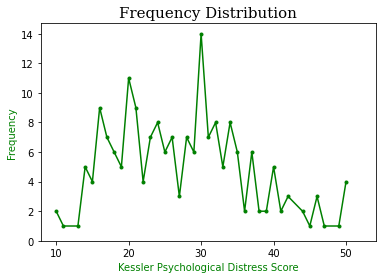

In [18]:
intervals1 = []
intervals2 = []

for i in sorted(target['k10'].unique()):
    intervals1.append(i)
    intervals2.append(i)
    
intervals2.append(52)

font1 = {'color':'green','size':10}
font2 = {'family':'serif','size':15}


y,edges,_=plt.hist(target['k10'], bins=intervals2, histtype='step', edgecolor='w')


plt.title("Frequency Distribution", fontdict = font2)
plt.xlabel("Kessler Psychological Distress Score", fontdict = font1)
plt.ylabel("Frequency", fontdict = font1)

plt.plot(intervals1,y, "g.-")
plt.show()

In [19]:
target

,tired_out,nervous_strungup,not_calmed,hopeless,restless/fidgety,unable_sit_still,depressed,lost_effort,nothing_cheer_up,worthless,k10
0,1,4,3,3,4,3,2,3,2,4,29
1,3,2,1,4,2,1,4,2,4,4,27
2,3,2,2,1,3,1,1,1,2,1,17
3,1,1,1,2,1,1,2,3,2,3,17
4,3,5,3,5,5,3,4,5,3,1,37
5,3,4,4,5,4,3,4,5,5,5,42
6,2,2,2,2,2,2,2,2,2,2,20
7,5,4,3,5,4,4,4,4,4,4,41
8,4,4,4,5,4,3,4,4,3,5,40
9,4,3,2,3,3,3,3,3,3,1,28


In [20]:
y_train = target['k10']

In [21]:
del target

y_train

0      29
1      27
2      17
3      17
4      37
5      42
6      20
7      41
8      40
9      28
10     14
11     45
12     20
13     26
14     14
15     40
16     27
17     34
18     17
19     35
20     34
21     34
22     16
23     30
24     26
25     29
26     30
27     32
28     29
29     35
30     34
31     50
32     50
33     46
34     41
35     44
36     37
37     24
38     31
39     20
40     30
41     30
42     23
43     30
44     27
45     16
46     19
47     49
48     31
49     29
50     14
51     24
52     32
53     42
54     32
55     26
56     32
57     40
58     32
59     38
60     24
61     34
62     17
63     30
64     21
65     23
66     28
67     23
68     33
69     28
70     18
71     42
72     24
73     46
74     10
75     20
76     18
77     32
78     23
79     26
80     30
81     17
82     19
83     13
84     16
85     39
86     39
87     30
88     30
89     50
90     20
91     14
92     44
93     28
94     21
95     28
96     25
97     36
98     33
99     50


In [22]:
# classes of target attribute
d = {range(10, 25): 'well', range(25, 51): 'unwell'}

y_train = y_train.apply(lambda x: next((v for k, v in d.items() if x in k), 0))

In [23]:
del d

y_train.value_counts()

unwell    111
well       79
Name: k10, dtype: int64

### Handling categorical data

In [24]:
# dropping all colums that were used to build target class
x_all = df.drop(columns= target_cols, axis=1)

In [25]:
x_all

,age,sex,study_year,study_hours,late_submits,new_face_cope_up,caffeine_increase_exam,sleep_hours,sleep_depth,difficulty_waking_up,dream_type,sleeping_irregularity,sleeping_disorder,caffeine_before_bed,difficulty_staying_asleep,use_sleep_aids,bed_at_same_time,thoughts_keep_awake,scared/panicky,lonely,irritability,short_tempered,memory/conentration_prob,self_doubt,easily_frustrated,inadequate,insecure,grieving,low_self_esteem,worried,dead_wish,idea_kill_self,not_worth_living,shaking,headache/dizzy,weight_change,stomach_ache,heart_pounding,digestion_probs,over_breathing,sweaty_hand/feet,chest_pain,ill_w/o_reason,muscle_strain,pressure_in_head,appetite_change,caffeine_per_day,family_communication,violence_event,financial_setback,death_of_loved_one,news_of_chronic_illness,breakup/divorced
0,21.0,Male,Second year,5.0,Yes,Yes,Yes,7,Deep,Yes,Positive things,No,No,Yes,Sometimes,Never,Yes,No,Often,Yes,No,Yes,No,Often,Yes,Yes,Yes,No,Yes,Yes,Yes,Sometimes,Sometimes,Yes,No,No,No,Yes,No,Yes,Yes,No,Not at all,Sometimes,Sometimes,No,"greater than 3, less than 6",Good,No,No,No,Yes,No
1,20.0,Male,First year,2.5,No,No,No,8,Light,No,Positive things,No,No,No,Never,Never,No,Yes,Sometimes,Yes,No,No,Yes,Sometimes,No,Yes,Yes,Yes,Yes,No,No,Never,Never,No,No,No,No,No,No,No,No,No,Not at all,Often,Never,No,less than or equal 3,Neutral,No,No,No,No,No
2,21.0,Male,Second year,2.0,Yes,No,No,10,Neutral,No,Positive things,Yes,Yes,No,Often,Never,No,Yes,Sometimes,No,No,Yes,Yes,Sometimes,No,No,Yes,Yes,No,No,No,Never,Never,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,No,Not at all,Sometimes,Sometimes,No,less than or equal 3,Good,No,No,Yes,Yes,No
3,23.0,Male,Fourth year,1.0,Yes,No,Yes,7,Deep,No,Positive things,No,No,No,Never,Never,Yes,No,Never,No,No,No,No,Often,Yes,No,No,No,Yes,No,Yes,Never,Sometimes,No,No,No,No,No,No,No,No,No,Not at all,Never,Never,No,less than or equal 3,Good,No,Yes,No,No,No
4,21.0,Male,Third year,1.0,Yes,No,No,7,Deep,Yes,Positive things,Yes,Yes,No,Never,Sometimes,No,Yes,Often,No,No,No,Yes,Never,Yes,No,No,Yes,No,No,No,Never,Never,Yes,Yes,Yes,No,Yes,Yes,Yes,No,Yes,No more than usual,Sometimes,Sometimes,No,less than or equal 3,Neutral,No,Yes,Yes,Yes,No
5,26.0,Male,Fifth year and up,1.0,No,Yes,Yes,6,Neutral,Yes,Negative things,Yes,No,No,Sometimes,Never,No,Yes,Sometimes,Yes,Yes,Yes,Yes,Often,Yes,Yes,Yes,Yes,Yes,No,Yes,Often,Often,No,No,No,No,No,No,No,No,No,Not at all,Sometimes,Often,No,less than or equal 3,Neutral,No,Yes,No,No,No
6,20.0,Female,Second year,4.0,Yes,No,Yes,8,Neutral,No,Positive things,No,No,No,Never,Never,Yes,No,Never,No,No,No,No,Sometimes,No,Yes,No,No,No,No,No,Often,Often,No,No,No,No,No,No,No,No,Yes,Not at all,Never,Never,No,less than or equal 3,Good,No,No,Yes,No,No
7,22.0,Female,Second year,2.0,Yes,No,No,8,Light,Yes,Negative things,Yes,Yes,No,Sometimes,Always,No,Yes,Always,Yes,Yes,No,Yes,Often,Yes,Yes,Yes,No,Yes,Yes,Yes,Often,Often,Yes,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Rather more than usual,Often,Sometimes,Yes,less than or equal 3,Neutral,No,No,Yes,No,No
8,22.0,Male,Fourth year,2.0,Yes,No,No,5,Light,Yes,Negative things,Yes,Yes,No,Often,Sometimes,No,Yes,Sometimes,Yes,Yes,Yes,Yes,Always,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Sometimes,Always,Yes,No,Yes,No,Yes,No,No,Yes,No,Rather more than usual,Never,Often,Yes,less than or equal 3,Bad,Yes,No,No,No,Yes
9,25.0,Female,Fifth year and up,1.0,Yes,No,No,8,Deep,Yes,Negative things,No,No,No,Sometimes,Never,No,No,Sometimes,No,Yes,Yes,Yes,Never,No,No,No,No,No,Yes,No,Never,Never,No,No,Yes,No,Yes,No,No,No,No,Rather more than usual,Never,Sometimes,No,less than or equal 3,Good,No,No,No,No,No


##### Mapping Sex
- Male = 0

- Female = 1


In [26]:
x_all['sex'] = x_all['sex'].map({'Male': 0,'Female': 1}).astype(int)

##### Mapping communication among family
- Good = 1
- Neutral = 0
- Bad = -1


In [27]:
x_all['family_communication'] = x_all['family_communication'].map({'Good': 1, 'Neutral': 0, 'Bad': -1}).astype(int)

###### Mapping dream type
- Positive things = 1
- Negative things = -1

In [28]:
x_all['dream_type'] = x_all['dream_type'].map({'Positive things': 1,'Negative things': -1}).astype(int)

In [29]:
x_all

,age,sex,study_year,study_hours,late_submits,new_face_cope_up,caffeine_increase_exam,sleep_hours,sleep_depth,difficulty_waking_up,dream_type,sleeping_irregularity,sleeping_disorder,caffeine_before_bed,difficulty_staying_asleep,use_sleep_aids,bed_at_same_time,thoughts_keep_awake,scared/panicky,lonely,irritability,short_tempered,memory/conentration_prob,self_doubt,easily_frustrated,inadequate,insecure,grieving,low_self_esteem,worried,dead_wish,idea_kill_self,not_worth_living,shaking,headache/dizzy,weight_change,stomach_ache,heart_pounding,digestion_probs,over_breathing,sweaty_hand/feet,chest_pain,ill_w/o_reason,muscle_strain,pressure_in_head,appetite_change,caffeine_per_day,family_communication,violence_event,financial_setback,death_of_loved_one,news_of_chronic_illness,breakup/divorced
0,21.0,0,Second year,5.0,Yes,Yes,Yes,7,Deep,Yes,1,No,No,Yes,Sometimes,Never,Yes,No,Often,Yes,No,Yes,No,Often,Yes,Yes,Yes,No,Yes,Yes,Yes,Sometimes,Sometimes,Yes,No,No,No,Yes,No,Yes,Yes,No,Not at all,Sometimes,Sometimes,No,"greater than 3, less than 6",1,No,No,No,Yes,No
1,20.0,0,First year,2.5,No,No,No,8,Light,No,1,No,No,No,Never,Never,No,Yes,Sometimes,Yes,No,No,Yes,Sometimes,No,Yes,Yes,Yes,Yes,No,No,Never,Never,No,No,No,No,No,No,No,No,No,Not at all,Often,Never,No,less than or equal 3,0,No,No,No,No,No
2,21.0,0,Second year,2.0,Yes,No,No,10,Neutral,No,1,Yes,Yes,No,Often,Never,No,Yes,Sometimes,No,No,Yes,Yes,Sometimes,No,No,Yes,Yes,No,No,No,Never,Never,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,No,Not at all,Sometimes,Sometimes,No,less than or equal 3,1,No,No,Yes,Yes,No
3,23.0,0,Fourth year,1.0,Yes,No,Yes,7,Deep,No,1,No,No,No,Never,Never,Yes,No,Never,No,No,No,No,Often,Yes,No,No,No,Yes,No,Yes,Never,Sometimes,No,No,No,No,No,No,No,No,No,Not at all,Never,Never,No,less than or equal 3,1,No,Yes,No,No,No
4,21.0,0,Third year,1.0,Yes,No,No,7,Deep,Yes,1,Yes,Yes,No,Never,Sometimes,No,Yes,Often,No,No,No,Yes,Never,Yes,No,No,Yes,No,No,No,Never,Never,Yes,Yes,Yes,No,Yes,Yes,Yes,No,Yes,No more than usual,Sometimes,Sometimes,No,less than or equal 3,0,No,Yes,Yes,Yes,No
5,26.0,0,Fifth year and up,1.0,No,Yes,Yes,6,Neutral,Yes,-1,Yes,No,No,Sometimes,Never,No,Yes,Sometimes,Yes,Yes,Yes,Yes,Often,Yes,Yes,Yes,Yes,Yes,No,Yes,Often,Often,No,No,No,No,No,No,No,No,No,Not at all,Sometimes,Often,No,less than or equal 3,0,No,Yes,No,No,No
6,20.0,1,Second year,4.0,Yes,No,Yes,8,Neutral,No,1,No,No,No,Never,Never,Yes,No,Never,No,No,No,No,Sometimes,No,Yes,No,No,No,No,No,Often,Often,No,No,No,No,No,No,No,No,Yes,Not at all,Never,Never,No,less than or equal 3,1,No,No,Yes,No,No
7,22.0,1,Second year,2.0,Yes,No,No,8,Light,Yes,-1,Yes,Yes,No,Sometimes,Always,No,Yes,Always,Yes,Yes,No,Yes,Often,Yes,Yes,Yes,No,Yes,Yes,Yes,Often,Often,Yes,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Rather more than usual,Often,Sometimes,Yes,less than or equal 3,0,No,No,Yes,No,No
8,22.0,0,Fourth year,2.0,Yes,No,No,5,Light,Yes,-1,Yes,Yes,No,Often,Sometimes,No,Yes,Sometimes,Yes,Yes,Yes,Yes,Always,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Sometimes,Always,Yes,No,Yes,No,Yes,No,No,Yes,No,Rather more than usual,Never,Often,Yes,less than or equal 3,-1,Yes,No,No,No,Yes
9,25.0,1,Fifth year and up,1.0,Yes,No,No,8,Deep,Yes,-1,No,No,No,Sometimes,Never,No,No,Sometimes,No,Yes,Yes,Yes,Never,No,No,No,No,No,Yes,No,Never,Never,No,No,Yes,No,Yes,No,No,No,No,Rather more than usual,Never,Sometimes,No,less than or equal 3,1,No,No,No,No,No


##### The best method to encode categorical variables with values Yes/No is replacing them with 1/0
- Yes = 1
- No = 0

In [30]:
# yes no categorical values
yes_no_cols = ['late_submits', 'new_face_cope_up', 'caffeine_increase_exam', 'difficulty_waking_up', 'sleeping_irregularity',
               'sleeping_disorder', 'caffeine_before_bed', 'bed_at_same_time', 'thoughts_keep_awake', 'lonely', 'irritability',
               'short_tempered', 'memory/conentration_prob', 'easily_frustrated', 'inadequate', 'insecure', 'grieving',
               'low_self_esteem', 'worried', 'dead_wish', 'shaking', 'headache/dizzy', 'weight_change', 'stomach_ache', 
               'heart_pounding', 'digestion_probs', 'over_breathing', 'sweaty_hand/feet', 'chest_pain', 'appetite_change',
               'violence_event', 'financial_setback', 'death_of_loved_one', 'news_of_chronic_illness', 'breakup/divorced']

for data in yes_no_cols:
    x_all[data] = x_all[data].map({'Yes': 1,'No': 0}).astype(int)
    
del yes_no_cols

In [31]:
x_all

,age,sex,study_year,study_hours,late_submits,new_face_cope_up,caffeine_increase_exam,sleep_hours,sleep_depth,difficulty_waking_up,dream_type,sleeping_irregularity,sleeping_disorder,caffeine_before_bed,difficulty_staying_asleep,use_sleep_aids,bed_at_same_time,thoughts_keep_awake,scared/panicky,lonely,irritability,short_tempered,memory/conentration_prob,self_doubt,easily_frustrated,inadequate,insecure,grieving,low_self_esteem,worried,dead_wish,idea_kill_self,not_worth_living,shaking,headache/dizzy,weight_change,stomach_ache,heart_pounding,digestion_probs,over_breathing,sweaty_hand/feet,chest_pain,ill_w/o_reason,muscle_strain,pressure_in_head,appetite_change,caffeine_per_day,family_communication,violence_event,financial_setback,death_of_loved_one,news_of_chronic_illness,breakup/divorced
0,21.0,0,Second year,5.0,1,1,1,7,Deep,1,1,0,0,1,Sometimes,Never,1,0,Often,1,0,1,0,Often,1,1,1,0,1,1,1,Sometimes,Sometimes,1,0,0,0,1,0,1,1,0,Not at all,Sometimes,Sometimes,0,"greater than 3, less than 6",1,0,0,0,1,0
1,20.0,0,First year,2.5,0,0,0,8,Light,0,1,0,0,0,Never,Never,0,1,Sometimes,1,0,0,1,Sometimes,0,1,1,1,1,0,0,Never,Never,0,0,0,0,0,0,0,0,0,Not at all,Often,Never,0,less than or equal 3,0,0,0,0,0,0
2,21.0,0,Second year,2.0,1,0,0,10,Neutral,0,1,1,1,0,Often,Never,0,1,Sometimes,0,0,1,1,Sometimes,0,0,1,1,0,0,0,Never,Never,1,1,1,0,1,1,1,1,0,Not at all,Sometimes,Sometimes,0,less than or equal 3,1,0,0,1,1,0
3,23.0,0,Fourth year,1.0,1,0,1,7,Deep,0,1,0,0,0,Never,Never,1,0,Never,0,0,0,0,Often,1,0,0,0,1,0,1,Never,Sometimes,0,0,0,0,0,0,0,0,0,Not at all,Never,Never,0,less than or equal 3,1,0,1,0,0,0
4,21.0,0,Third year,1.0,1,0,0,7,Deep,1,1,1,1,0,Never,Sometimes,0,1,Often,0,0,0,1,Never,1,0,0,1,0,0,0,Never,Never,1,1,1,0,1,1,1,0,1,No more than usual,Sometimes,Sometimes,0,less than or equal 3,0,0,1,1,1,0
5,26.0,0,Fifth year and up,1.0,0,1,1,6,Neutral,1,-1,1,0,0,Sometimes,Never,0,1,Sometimes,1,1,1,1,Often,1,1,1,1,1,0,1,Often,Often,0,0,0,0,0,0,0,0,0,Not at all,Sometimes,Often,0,less than or equal 3,0,0,1,0,0,0
6,20.0,1,Second year,4.0,1,0,1,8,Neutral,0,1,0,0,0,Never,Never,1,0,Never,0,0,0,0,Sometimes,0,1,0,0,0,0,0,Often,Often,0,0,0,0,0,0,0,0,1,Not at all,Never,Never,0,less than or equal 3,1,0,0,1,0,0
7,22.0,1,Second year,2.0,1,0,0,8,Light,1,-1,1,1,0,Sometimes,Always,0,1,Always,1,1,0,1,Often,1,1,1,0,1,1,1,Often,Often,1,1,1,0,1,1,1,0,1,Rather more than usual,Often,Sometimes,1,less than or equal 3,0,0,0,1,0,0
8,22.0,0,Fourth year,2.0,1,0,0,5,Light,1,-1,1,1,0,Often,Sometimes,0,1,Sometimes,1,1,1,1,Always,1,1,1,1,1,1,1,Sometimes,Always,1,0,1,0,1,0,0,1,0,Rather more than usual,Never,Often,1,less than or equal 3,-1,1,0,0,0,1
9,25.0,1,Fifth year and up,1.0,1,0,0,8,Deep,1,-1,0,0,0,Sometimes,Never,0,0,Sometimes,0,1,1,1,Never,0,0,0,0,0,1,0,Never,Never,0,0,1,0,1,0,0,0,0,Rather more than usual,Never,Sometimes,0,less than or equal 3,1,0,0,0,0,0


##### Encoding Categories with  a few unique values using get dummies

In [32]:
#non numerical attributes
non_numericals = ['study_year', 'sleep_depth', 'sleep_depth', 'difficulty_staying_asleep', 'use_sleep_aids', 'scared/panicky',
                  'self_doubt', 'idea_kill_self', 'not_worth_living', 'ill_w/o_reason', 'muscle_strain, pressure_in_head', 
                  'muscle_strain', 'pressure_in_head', 'caffeine_per_day']

# declare empty dataframe
x_all_dum = pd.DataFrame(columns = ['temp'])

for data in x_all:
    
    if data in non_numericals:
        dummies = pd.get_dummies(x_all[data], prefix=data)
        x_all_dum = pd.concat([x_all_dum, dummies], axis=1)
    
    else:
        x_all_dum[data] = x_all[data]
        

        
del non_numericals

x_all_dum = x_all_dum.drop(columns=['temp'])

In [33]:
x_all_dum

,age,sex,study_year_Fifth year and up,study_year_First year,study_year_Fourth year,study_year_Second year,study_year_Third year,study_hours,late_submits,new_face_cope_up,caffeine_increase_exam,sleep_hours,sleep_depth_Deep,sleep_depth_Light,sleep_depth_Mixed,sleep_depth_Neutral,difficulty_waking_up,dream_type,sleeping_irregularity,sleeping_disorder,caffeine_before_bed,difficulty_staying_asleep_Always,difficulty_staying_asleep_Never,difficulty_staying_asleep_Often,difficulty_staying_asleep_Sometimes,use_sleep_aids_Always,use_sleep_aids_Never,use_sleep_aids_Often,use_sleep_aids_Sometimes,bed_at_same_time,thoughts_keep_awake,scared/panicky_Always,scared/panicky_Never,scared/panicky_Often,scared/panicky_Sometimes,lonely,irritability,short_tempered,memory/conentration_prob,self_doubt_Always,self_doubt_Never,self_doubt_Often,self_doubt_Sometimes,easily_frustrated,inadequate,insecure,grieving,low_self_esteem,worried,dead_wish,idea_kill_self_Always,idea_kill_self_Never,idea_kill_self_Often,idea_kill_self_Sometimes,not_worth_living_Always,not_worth_living_Never,not_worth_living_Often,not_worth_living_Sometimes,shaking,headache/dizzy,weight_change,stomach_ache,heart_pounding,digestion_probs,over_breathing,sweaty_hand/feet,chest_pain,ill_w/o_reason_Much more than usual,ill_w/o_reason_No more than usual,ill_w/o_reason_Not at all,ill_w/o_reason_Rather more than usual,muscle_strain_Always,muscle_strain_Never,muscle_strain_Often,muscle_strain_Sometimes,pressure_in_head_Always,pressure_in_head_Never,pressure_in_head_Often,pressure_in_head_Sometimes,appetite_change,"caffeine_per_day_greater than 3, less than 6",caffeine_per_day_greater than 6,caffeine_per_day_less than or equal 3,family_communication,violence_event,financial_setback,death_of_loved_one,news_of_chronic_illness,breakup/divorced
0,21.0,0,0,0,0,1,0,5.0,1,1,1,7,1,0,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0,1,1,1,0,1,1,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0
1,20.0,0,0,1,0,0,0,2.5,0,0,0,8,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,1,0,1,1,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
2,21.0,0,0,0,0,1,0,2.0,1,0,0,10,0,0,0,1,0,1,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,1,1,1,0,1,1,1,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,1,1,0
3,23.0,0,0,0,1,0,0,1.0,1,0,1,7,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0
4,21.0,0,0,0,0,0,1,1.0,1,0,0,7,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,1,1,0,1,1,1,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,1,1,0
5,26.0,0,1,0,0,0,0,1.0,0,1,1,6,0,0,0,1,1,-1,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,1,1,1,1,0,0,1,0,1,1,1,1,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0
6,20.0,1,0,0,0,1,0,4.0,1,0,1,8,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0
7,22.0,1,0,0,0,1,0,2.0,1,0,0,8,0,1,0,0,1,-1,1,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,1,1,0,1,0,0,1,0,1,1,1,0,1,1,1,0,0,1,0,0,0,1,0,1,1,1,0,1,1,1,0,1,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0
8,22.0,0,0,0,1,0,0,2.0,1,0,0,5,0,1,0,0,1,-1,1,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,1,1,1,1,1,0,0,0,1,1,1,1,1,1,1,0,0,0,1,1,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,1,-1,1,0,0,0,1
9,25.0,1,1,0,0,0,0,1.0,1,0,0,8,1,0,0,0,1,-1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,1,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0


##### scaling numerical variables using min-max scaler function

In [34]:
%%time

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# transform data
x_all_dum[x_all_dum.columns] = scaler.fit_transform(x_all_dum)

x_train = x_all_dum

del x_all_dum
del scaler

In [35]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, roc_auc_score

# 10-fold stratifiedFold
cv = StratifiedKFold(n_splits = 10, random_state = 1, shuffle = True)

def sort_scoring(scoring):
    if scoring == 'precision':
        return make_scorer(precision_score, average = 'macro')
    elif scoring == 'f1':
        return make_scorer(f1_score, average = 'macro')
    elif scoring == 'recall':
        return make_scorer(recall_score, average = 'macro')
    elif scoring == 'roc_auc':
        return make_scorer(roc_auc_score, average = 'macro', multi_class='ovr', needs_proba=True)
    
    return scoring

In [36]:
%%time

from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.dummy import DummyClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier

# instantiate base ZeroR model class
dummy = DummyClassifier()

# instantiate base Logistic Regression model class
lr = LogisticRegression()

# instantiate base Decision Tree model class
dt = DecisionTreeClassifier(random_state=42)

# instantiate base Naive bayes model class
nb = GaussianNB()

# instantiate base random forest model class
rf = RandomForestClassifier(random_state=42)

# instantiate base support vector machine model class
svc = SVC(probability=True)

# instantiate base k-nearest-neighbor model class
knn = KNeighborsClassifier()

# instantiate base adaBoost model class
adbst = AdaBoostClassifier(random_state=42)

# instantiate base gradient boosting model class
gb = GradientBoostingClassifier(random_state=42)

# instantiate base xgb model class
xgb = XGBClassifier(eval_metric= 'logloss')

# instantiate base xgb model class
et = ExtraTreesClassifier(random_state=42)

In [37]:
from numpy import mean, std


accuracy= []

accuracy_result= []
precision_result= []
recall_result= []
f1_result= []
roc_auc_result= []

estimator1= [dummy, lr, dt, nb, rf, svc, knn, adbst, gb, xgb, et]
models_name= ['ZeroR','Logistic Regression', 'Decision Tree Classifier', 'Naive Bayes Classifier', 'Random Forest', 
              'Support Vector Machine', 'K-Nearest-Neighbor', 'AdaBoost Classifier', 'Gradient Boosting Classifier', 
              'XGBoost Classifier', 'ExtraTreesClassifier']

def models(X_train, y_train, score='accuracy', estimators=estimator1, save= False):
    
    scoring = sort_scoring(score)

    temp1= []
    temp2= []

    
    for i in range(len(models_name)):
        scores = cross_val_score(estimators[i], X_train, y_train, scoring = scoring, cv = cv, n_jobs = 1, error_score='raise')
        print('%-30s   : %.3f (%.3f)' % (models_name[i], round(mean(scores), 3), round(std(scores), 3)))
        
        temp1.append('%.1f +/- %.1f%%' % (round(mean(scores), 3)*100, round(std(scores), 3)*100))
        temp2.append('%3.2f' %(round(mean(scores), 3)*100))
        
    if save:
        
        if score == 'accuracy':
            accuracy.extend(temp2)
            accuracy_result.extend(temp1)
        
        if score == 'precision':
            precision_result.extend(temp2)
        
        if score == 'recall':
            recall_result.extend(temp2)
        
        if score == 'f1':
            f1_result.extend(temp2)
        
        if score == 'roc_auc':
            roc_auc_result.extend(temp2)

    temp1.clear()
    temp2.clear()


    
    
run_model= []
expt_name= []


def eval_models(inputX, outputY, experiment=None, save=False):
    print('Accuracy:')
    models(inputX, outputY, score='accuracy', save=save)

    print('\n\nPrecision:')
    models(inputX, outputY, score='precision', save=save)

    print('\n\n\nRecall:')
    models(inputX, outputY, score='recall', save=save)

    print('\n\n\nF-measure:')
    models(inputX, outputY, score='f1', save=save)

    print('\n\n\nROC:')
    models(inputX, outputY, score='roc_auc', save=save)
    
    run_model.extend(models_name)
    
    for i in range(0,len(models_name)):
        expt_name.append("%s" % (experiment))

In [38]:
%%time

eval_models(x_train, y_train, "A", True)

Accuracy:
ZeroR                            : 0.584 (0.016)
Logistic Regression              : 0.774 (0.082)
Decision Tree Classifier         : 0.753 (0.062)
Naive Bayes Classifier           : 0.721 (0.127)
Random Forest                    : 0.800 (0.066)
Support Vector Machine           : 0.826 (0.062)
K-Nearest-Neighbor               : 0.837 (0.050)
AdaBoost Classifier              : 0.758 (0.082)
Gradient Boosting Classifier     : 0.800 (0.070)
XGBoost Classifier               : 0.805 (0.058)
ExtraTreesClassifier             : 0.821 (0.063)


Precision:
ZeroR                            : 0.292 (0.008)
Logistic Regression              : 0.784 (0.078)
Decision Tree Classifier         : 0.757 (0.060)
Naive Bayes Classifier           : 0.751 (0.124)
Random Forest                    : 0.813 (0.071)
Support Vector Machine           : 0.833 (0.060)
K-Nearest-Neighbor               : 0.837 (0.050)
AdaBoost Classifier              : 0.766 (0.074)
Gradient Boosting Classifier     : 0.813 (0.07

## Feature Selection

---

#### Pearson's Correlation

In [39]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    
    for i in range(len(corr_matrix.columns)):
    
        for j in range(i):
            
            if (abs(corr_matrix.iloc[i, j])) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    
    return col_corr

In [40]:
corr_features = correlation(x_train, 0.8)

In [41]:
x_corr = x_train.drop(columns= corr_features)

In [42]:
print(corr_features)

{'caffeine_per_day_less than or equal 3', 'use_sleep_aids_Sometimes'}


In [43]:
%%time
eval_models(x_corr, y_train, "B", True)

Accuracy:
ZeroR                            : 0.584 (0.016)
Logistic Regression              : 0.768 (0.075)
Decision Tree Classifier         : 0.737 (0.071)
Naive Bayes Classifier           : 0.721 (0.127)
Random Forest                    : 0.837 (0.064)
Support Vector Machine           : 0.826 (0.062)
K-Nearest-Neighbor               : 0.832 (0.046)
AdaBoost Classifier              : 0.758 (0.082)
Gradient Boosting Classifier     : 0.795 (0.068)
XGBoost Classifier               : 0.816 (0.068)
ExtraTreesClassifier             : 0.832 (0.061)


Precision:
ZeroR                            : 0.292 (0.008)
Logistic Regression              : 0.779 (0.072)
Decision Tree Classifier         : 0.735 (0.073)
Naive Bayes Classifier           : 0.751 (0.124)
Random Forest                    : 0.847 (0.066)
Support Vector Machine           : 0.833 (0.060)
K-Nearest-Neighbor               : 0.832 (0.048)
AdaBoost Classifier              : 0.766 (0.074)
Gradient Boosting Classifier     : 0.806 (0.07

---

#### RFE

In [44]:
%%time

from sklearn.feature_selection import RFE


# checked for all features
'''for index in range(len(x_train.columns)):
    
    selector = RFE(dt, n_features_to_select = index+1, step = 1)
    selector = selector.fit(x_train, y_train)
    x_rfe = selector.transform(x_train)
        
    print('Selected number of features: ', index+1)
    
    for i in range(x_train.shape[1]):

        if selector.support_[i]:
            print('%s,' % (x_train.columns[i]), end =" ")
    
    print('\n')
    print('Accuracy:')
    models(x_rfe, y_train)

    print('\n')
'''

rfe_features = []

selector = RFE(dt, n_features_to_select = 8, step = 1)
selector = selector.fit(x_train.values, y_train)

for i in range(x_train.shape[1]):
    if selector.support_[i]:
        rfe_features.append(x_train.columns[i])
        
x_rfe = x_train[rfe_features]

print(x_rfe.columns)

Index(['dream_type', 'scared/panicky_Never', 'lonely', 'irritability',
       'memory/conentration_prob', 'idea_kill_self_Never', 'chest_pain',
       'ill_w/o_reason_Not at all'],
      dtype='object')


In [45]:
%%time

eval_models(x_rfe, y_train, "C", True)

Accuracy:
ZeroR                            : 0.584 (0.016)
Logistic Regression              : 0.805 (0.071)
Decision Tree Classifier         : 0.837 (0.076)
Naive Bayes Classifier           : 0.816 (0.049)
Random Forest                    : 0.879 (0.047)
Support Vector Machine           : 0.884 (0.046)
K-Nearest-Neighbor               : 0.858 (0.047)
AdaBoost Classifier              : 0.805 (0.071)
Gradient Boosting Classifier     : 0.879 (0.041)
XGBoost Classifier               : 0.895 (0.033)
ExtraTreesClassifier             : 0.842 (0.067)


Precision:
ZeroR                            : 0.292 (0.008)
Logistic Regression              : 0.816 (0.077)
Decision Tree Classifier         : 0.843 (0.073)
Naive Bayes Classifier           : 0.823 (0.047)
Random Forest                    : 0.883 (0.047)
Support Vector Machine           : 0.895 (0.045)
K-Nearest-Neighbor               : 0.868 (0.050)
AdaBoost Classifier              : 0.816 (0.076)
Gradient Boosting Classifier     : 0.885 (0.04

#### Chi Square

In [46]:
%%time

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

'''
for index in range(len(x_train.columns)):
    
    chi2_features = SelectKBest(chi2, index+1)
    x_chi2 = chi2_features.fit_transform(x_train, y_train)
    
    cols = x_train.columns[chi2_features.get_support(indices=True)]
    
    print('Selected number of features: ', index+1)
    for i in cols:
        print('%s,' % (i), end =" ")
        
    print('\n')
    print('Accuracy:')
    models(x_chi2, y_train)

    print('\n')
    
'''

no_chi2_features = SelectKBest(chi2, 15) # 9 0.842
x_chi2 = no_chi2_features.fit_transform(x_train, y_train)

chi2_features = []

cols = x_train.columns[no_chi2_features.get_support(indices=True)] 
    
for i in cols:
    chi2_features.append(i)

x_chi2 = x_train[chi2_features]

print(x_chi2.columns)

Index(['dream_type', 'sleeping_disorder', 'difficulty_staying_asleep_Never',
       'scared/panicky_Never', 'lonely', 'grieving', 'dead_wish',
       'idea_kill_self_Never', 'idea_kill_self_Sometimes',
       'not_worth_living_Never', 'not_worth_living_Often', 'heart_pounding',
       'chest_pain', 'ill_w/o_reason_Not at all', 'appetite_change'],
      dtype='object')


In [47]:
%%time

eval_models(x_chi2, y_train, "D", True)

Accuracy:
ZeroR                            : 0.584 (0.016)
Logistic Regression              : 0.816 (0.063)
Decision Tree Classifier         : 0.758 (0.095)
Naive Bayes Classifier           : 0.816 (0.079)
Random Forest                    : 0.816 (0.063)
Support Vector Machine           : 0.826 (0.041)
K-Nearest-Neighbor               : 0.805 (0.058)
AdaBoost Classifier              : 0.805 (0.053)
Gradient Boosting Classifier     : 0.863 (0.063)
XGBoost Classifier               : 0.832 (0.070)
ExtraTreesClassifier             : 0.795 (0.083)


Precision:
ZeroR                            : 0.292 (0.008)
Logistic Regression              : 0.829 (0.065)
Decision Tree Classifier         : 0.767 (0.104)
Naive Bayes Classifier           : 0.821 (0.075)
Random Forest                    : 0.837 (0.056)
Support Vector Machine           : 0.840 (0.043)
K-Nearest-Neighbor               : 0.814 (0.060)
AdaBoost Classifier              : 0.815 (0.053)
Gradient Boosting Classifier     : 0.871 (0.06

#### Info Gain

In [48]:
# Helpful methods

def plot_importance(columns_name, importance):

    # get the list of tuples from 2 lists and merge them by using zip(). 
    list_of_tuples = list(zip(columns_name, importance))

    # Converting lists of tuples into pandas Dataframe. 
    data = pd.DataFrame(list_of_tuples, columns = ['attribute', 'score']) 


    sns.set(style="whitegrid", color_codes=True)
    sns.set(rc={'figure.figsize':(12, 30)})
    sns.barplot(x=abs(data.score), y=data.attribute, palette=colors_from_values(abs(data.score), "rocket_r"))
    plt.show()
    
    del list_of_tuples
    del data
    
def colors_from_values(values, palette_name):
    # normalize the values to range [0, 1]
    normalized = (values - min(values)) / (max(values) - min(values))
    # convert to indices
    indices = np.round(normalized * (len(values) - 1)).astype(np.int32)
    # use the indices to get the colors
    palette = sns.color_palette(palette_name, len(values))
    return np.array(palette).take(indices, axis=0)

def save_result(name):

    # get the list of tuples from 6 lists and merge them by using zip(). 
    list_of_tuples1 = list(zip(expt_name, run_model, precision_result, recall_result, f1_result, roc_auc_result,
                              accuracy_result)) 
    list_of_tuples2 = list(zip(expt_name, run_model, accuracy))

    # Converting lists of tuples into pandas Dataframe. 
    data1 = pd.DataFrame(list_of_tuples1, columns = ['Experiment', 'Model', 'Precision', 'Recall', 'F1', 'ROC_AUC', 'Accuracy']) 
    data2 = pd.DataFrame(list_of_tuples2, columns = ['Experiment', 'Model', 'Accuracy'])
    
    data1.to_csv("data/results/%s.csv" %(name), index=False)
    data2.to_csv("data/results/%s-accuracy.csv" %(name), index=False)

    run_model.clear()
    expt_name.clear()

    precision_result.clear() 
    recall_result.clear()
    f1_result.clear() 
    roc_auc_result.clear() 
    accuracy_result.clear()
    accuracy.clear()
    
    del list_of_tuples1
    del list_of_tuples2
    del data1
    del data2

age                                                          Score: 0.00000
sex                                                          Score: 0.00000
study_year_Fifth year and up                                 Score: 0.00000
study_year_First year                                        Score: 0.00000
study_year_Fourth year                                       Score: 0.00000
study_year_Second year                                       Score: 0.06627
study_year_Third year                                        Score: 0.00000
study_hours                                                  Score: 0.00000
late_submits                                                 Score: 0.01030
new_face_cope_up                                             Score: 0.00000
caffeine_increase_exam                                       Score: 0.00000
sleep_hours                                                  Score: 0.00000
sleep_depth_Deep                                             Score: 0.02623
sleep_depth_

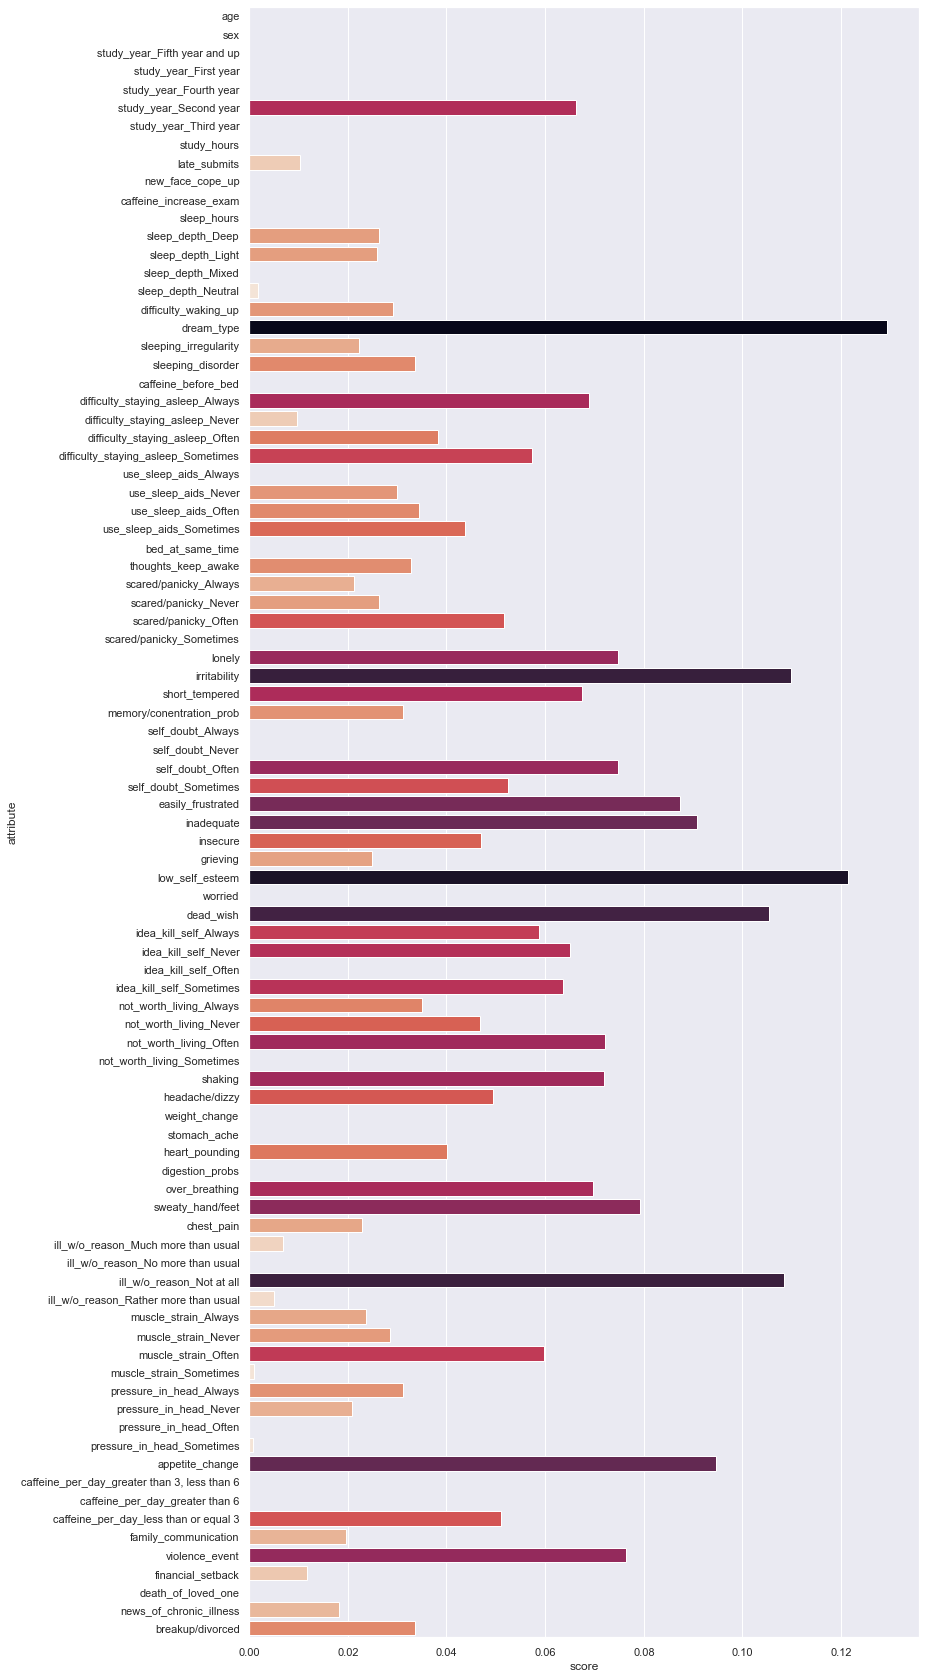

In [49]:
%%time

from sklearn.feature_selection import mutual_info_classif

# get importance
importance = mutual_info_classif(x_train, y_train, random_state= 42)



'''
    if v > (max(importance)/2):
        gain_features.append(x_train.columns[i])
'''

# summarize feature importance
for i,v in enumerate(importance):

    print('%-60s Score: %-3.5f' % (x_train.columns[i], v))
    
# plot feature importance
plot_importance(x_train.columns, importance)

In [50]:
# get the list of tuples from 2 lists and merge them by using zip(). 
list_of_tuples = list(zip(x_train.columns, importance))

# Converting lists of tuples into pandas Dataframe. 
data = pd.DataFrame(list_of_tuples, columns = ['attribute', 'score']) 

data = data.sort_values(by='score', ascending=False)
pd.options.display.max_rows = None
data

,attribute,score
17,dream_type,0.129294
47,low_self_esteem,0.121428
36,irritability,0.109867
69,ill_w/o_reason_Not at all,0.108528
49,dead_wish,0.105328
79,appetite_change,0.094643
44,inadequate,0.090739
43,easily_frustrated,0.087278
65,sweaty_hand/feet,0.079241
84,violence_event,0.076417


In [51]:
gain_features = ['dream_type', 'low_self_esteem', 'irritability', 'ill_w/o_reason_Not at all', 'dead_wish', 'appetite_change']
x_gain = x_train[gain_features]

In [52]:
%%time

eval_models(x_gain, y_train, "E", True)

Accuracy:
ZeroR                            : 0.584 (0.016)
Logistic Regression              : 0.821 (0.075)
Decision Tree Classifier         : 0.747 (0.131)
Naive Bayes Classifier           : 0.826 (0.071)
Random Forest                    : 0.800 (0.077)
Support Vector Machine           : 0.763 (0.118)
K-Nearest-Neighbor               : 0.789 (0.094)
AdaBoost Classifier              : 0.805 (0.082)
Gradient Boosting Classifier     : 0.774 (0.097)
XGBoost Classifier               : 0.763 (0.101)
ExtraTreesClassifier             : 0.763 (0.118)


Precision:
ZeroR                            : 0.292 (0.008)
Logistic Regression              : 0.829 (0.080)
Decision Tree Classifier         : 0.748 (0.149)
Naive Bayes Classifier           : 0.831 (0.071)
Random Forest                    : 0.810 (0.077)
Support Vector Machine           : 0.773 (0.121)
K-Nearest-Neighbor               : 0.803 (0.098)
AdaBoost Classifier              : 0.815 (0.090)
Gradient Boosting Classifier     : 0.783 (0.10

#### Ensemble

age                                                          Score: 0.01584
sex                                                          Score: 0.00798
study_year_Fifth year and up                                 Score: 0.00659
study_year_First year                                        Score: 0.00177
study_year_Fourth year                                       Score: 0.00382
study_year_Second year                                       Score: 0.00230
study_year_Third year                                        Score: 0.00564
study_hours                                                  Score: 0.01930
late_submits                                                 Score: 0.00664
new_face_cope_up                                             Score: 0.00954
caffeine_increase_exam                                       Score: 0.00950
sleep_hours                                                  Score: 0.03064
sleep_depth_Deep                                             Score: 0.00455
sleep_depth_

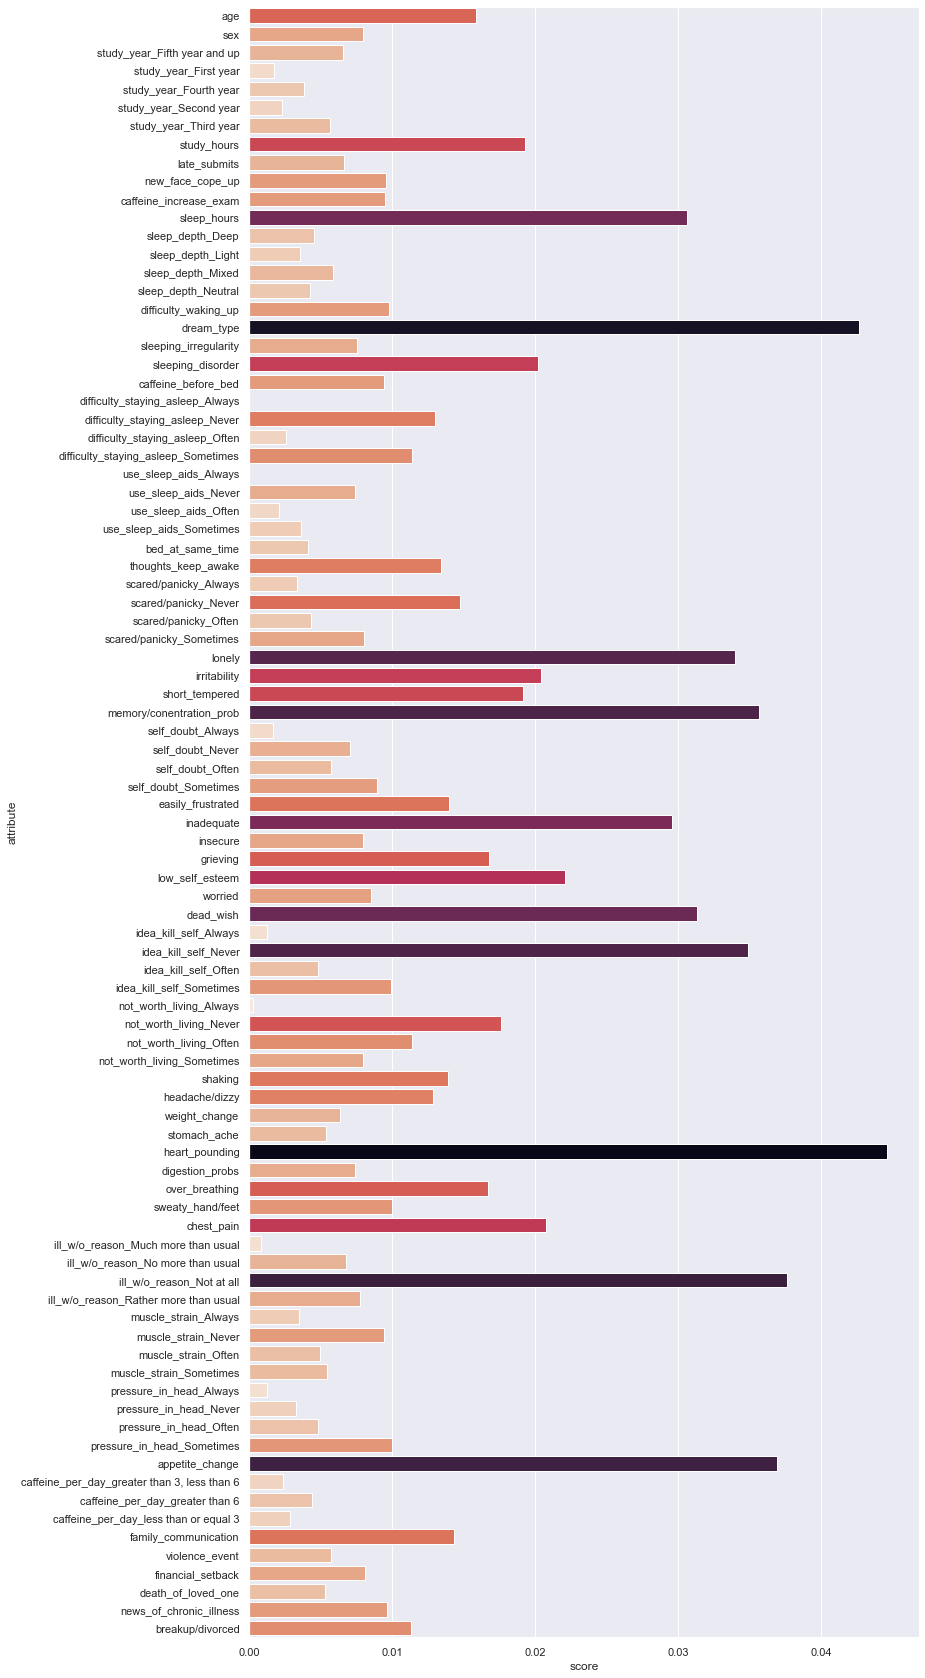

In [53]:
%%time

# Random Forest
rf = rf.fit(x_train, y_train)


# get importance
importance = rf.feature_importances_

for i, j in enumerate(importance):

    print('%-60s Score: %-3.5f' % (x_train.columns[i], j))
    
# plot feature importance
plot_importance(x_train.columns, importance)

In [54]:
# get the list of tuples from 2 lists and merge them by using zip(). 
list_of_tuples = list(zip(x_train.columns, importance))

# Converting lists of tuples into pandas Dataframe. 
data = pd.DataFrame(list_of_tuples, columns = ['attribute', 'score']) 

data = data.sort_values(by='score', ascending=False)

data

,attribute,score
62,heart_pounding,0.044580
17,dream_type,0.042601
69,ill_w/o_reason_Not at all,0.037597
79,appetite_change,0.036865
38,memory/conentration_prob,0.035632
51,idea_kill_self_Never,0.034857
35,lonely,0.033967
49,dead_wish,0.031278
11,sleep_hours,0.030638
44,inadequate,0.029550


In [55]:
ensemble_features = ['heart_pounding', 'dream_type', 'ill_w/o_reason_Not at all', 'appetite_change', 'memory/conentration_prob', 'idea_kill_self_Never', 'lonely', 'dead_wish', 'sleep_hours', 'inadequate']
x_ensemble = x_train[ensemble_features]

In [56]:
%%time

eval_models(x_ensemble, y_train, 'F', True)

Accuracy:
ZeroR                            : 0.584 (0.016)
Logistic Regression              : 0.837 (0.064)
Decision Tree Classifier         : 0.758 (0.082)
Naive Bayes Classifier           : 0.858 (0.047)
Random Forest                    : 0.779 (0.091)
Support Vector Machine           : 0.805 (0.082)
K-Nearest-Neighbor               : 0.800 (0.091)
AdaBoost Classifier              : 0.779 (0.102)
Gradient Boosting Classifier     : 0.821 (0.063)
XGBoost Classifier               : 0.779 (0.081)
ExtraTreesClassifier             : 0.763 (0.092)


Precision:
ZeroR                            : 0.292 (0.008)
Logistic Regression              : 0.839 (0.063)
Decision Tree Classifier         : 0.756 (0.084)
Naive Bayes Classifier           : 0.858 (0.049)
Random Forest                    : 0.788 (0.094)
Support Vector Machine           : 0.816 (0.080)
K-Nearest-Neighbor               : 0.805 (0.098)
AdaBoost Classifier              : 0.778 (0.103)
Gradient Boosting Classifier     : 0.830 (0.06

In [57]:
save_result('results')

In [58]:
rdf = pd.read_csv('data/results/results-accuracy.csv')

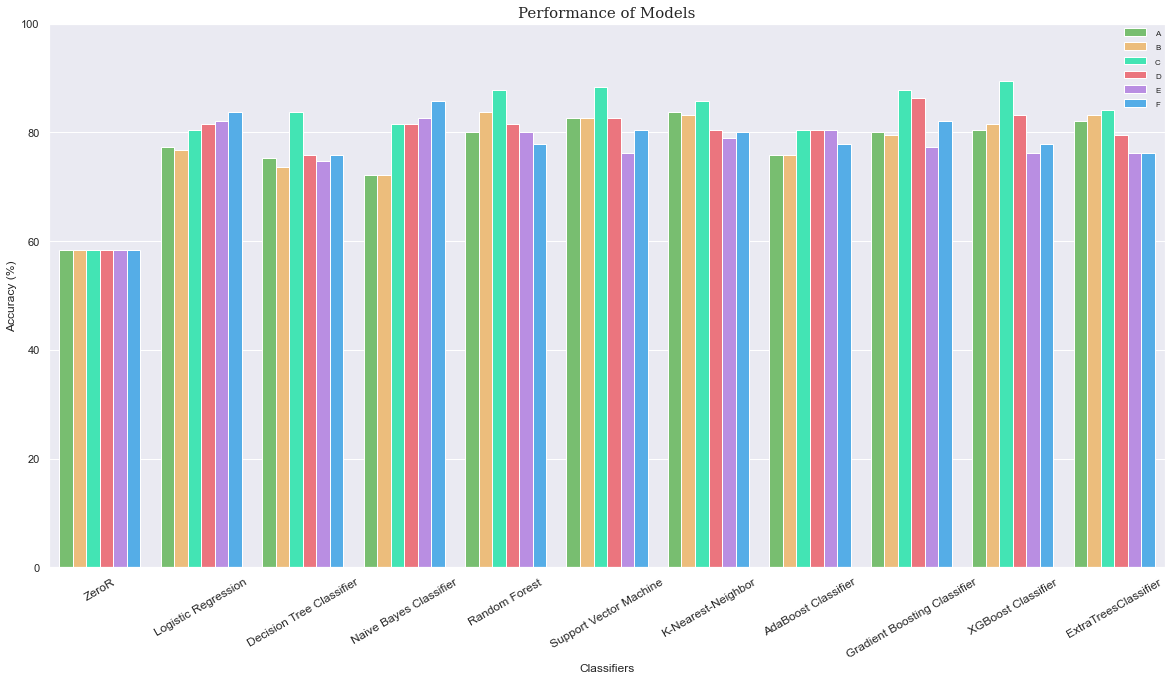

In [59]:
fig, ax = plt.subplots(figsize=(20,10))
ax.set_xticks([0, 20, 40, 60, 80])

# Create an array with the colors you want to use
#colors = ["#28FFBF", "#3DB2FF", "#B980F0", "#FFB740", "#FF616D", "#29BB89"]

colors = ["#6ECB63", "#FFC069", "#28FFBF", "#FF616D", "#B980F0", "#3DB2FF"]

# Set your custom color palette


sns.set_style("white")
sns.set_palette(sns.color_palette(colors))

plot = sns.barplot(x ="Model" , y = rdf['Accuracy'], hue ="Experiment", data = rdf)
plot.set(ylim=(0, 100))


plt.legend(bbox_to_anchor=(1, 1), loc=1, borderaxespad=0, frameon=False)
plt.setp(ax.get_legend().get_texts(), fontsize='8') # for legend text

# changing the fontsize of xticks
plt.xticks(fontsize=12,rotation=30)


plt.title("Performance of Models", fontdict = {'family':'serif','size':15})
plt.xlabel("Classifiers")
plt.ylabel("Accuracy (%)")



plt.show()